In [22]:
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

In [23]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

# 하나의 bbox를 그려줌

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    # bbox로부터 좌표값 추출하고, bbox rectagle 그리기
    
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    # class_name의 size 추출하고, text rectangle 그리고, text 삽입하기
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1) # 가로: text_width, 세로: int(1.3 * text_height)
    
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    
    #
    
    return img

# image 내의 모든 bbox를 그려줌

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    
    # 해당 image 내의 모든 bbox와 category_id 쌍에 대하여 visualize_bbox 수행
    
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        
        img = visualize_bbox(img, bbox, class_name)
    
    #
    
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

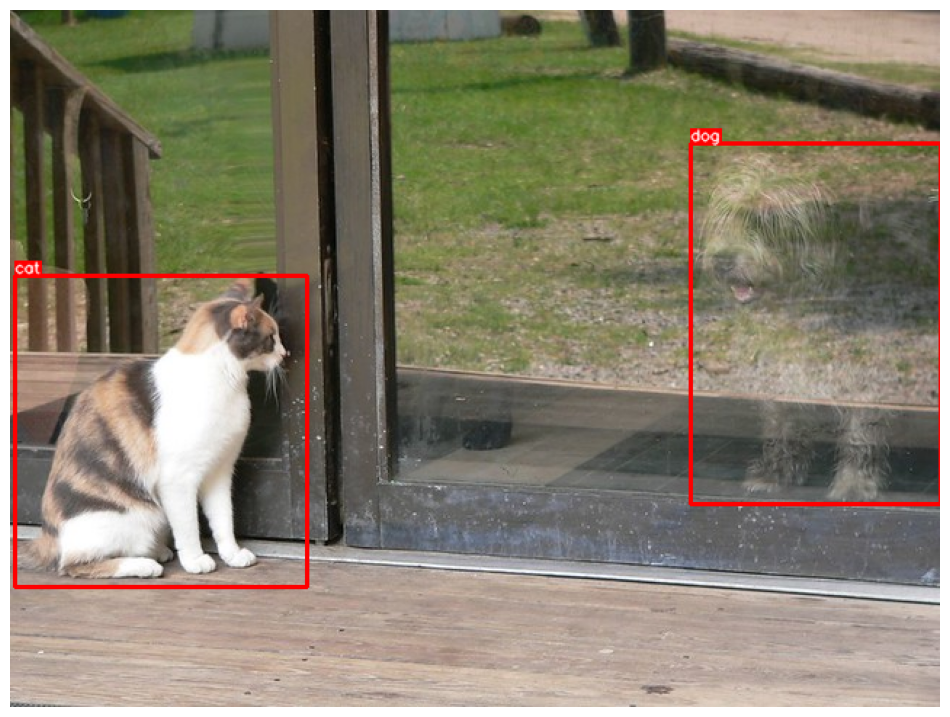

In [24]:
image = cv2.imread('./data/cat_dog.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = [[3.96, 183.38, 200.88, 214.03], [468.94, 92.01, 171.06, 248.45]]
category_ids = [0, 1]
category_id_to_name = {0: 'cat', 1: 'dog'}

visualize(image, bboxes, category_ids, category_id_to_name)

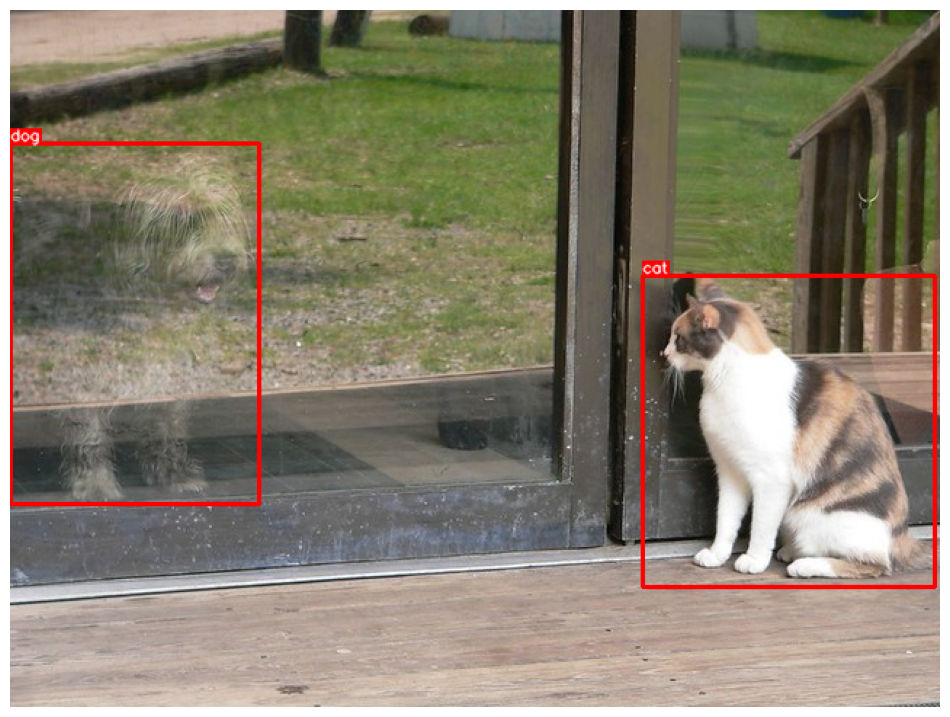

In [25]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']), 
        # label_fields에 들어간 리스트의 각 element -> image를 transform할 때, transform의 parameter가 됨
)

random.seed(7)

transformed_image = transform(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed_image['image'],
    transformed_image['bboxes'],
    transformed_image['category_ids'],
    category_id_to_name,
)

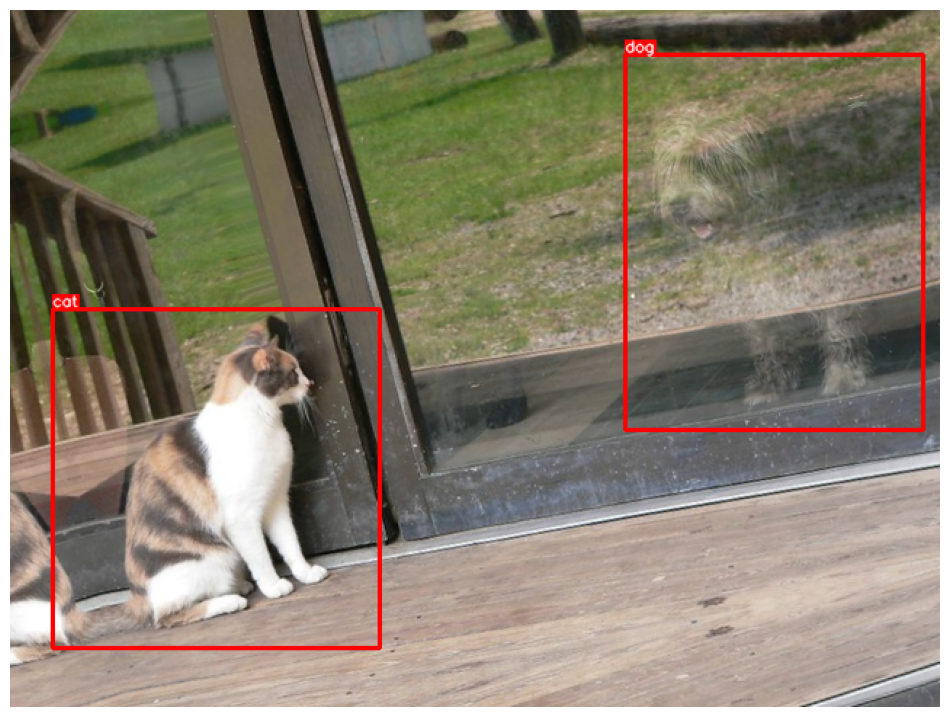

In [26]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

random.seed(7)

transformed_image = transform(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed_image['image'],
    transformed_image['bboxes'],
    transformed_image['category_ids'],
    category_id_to_name,
)

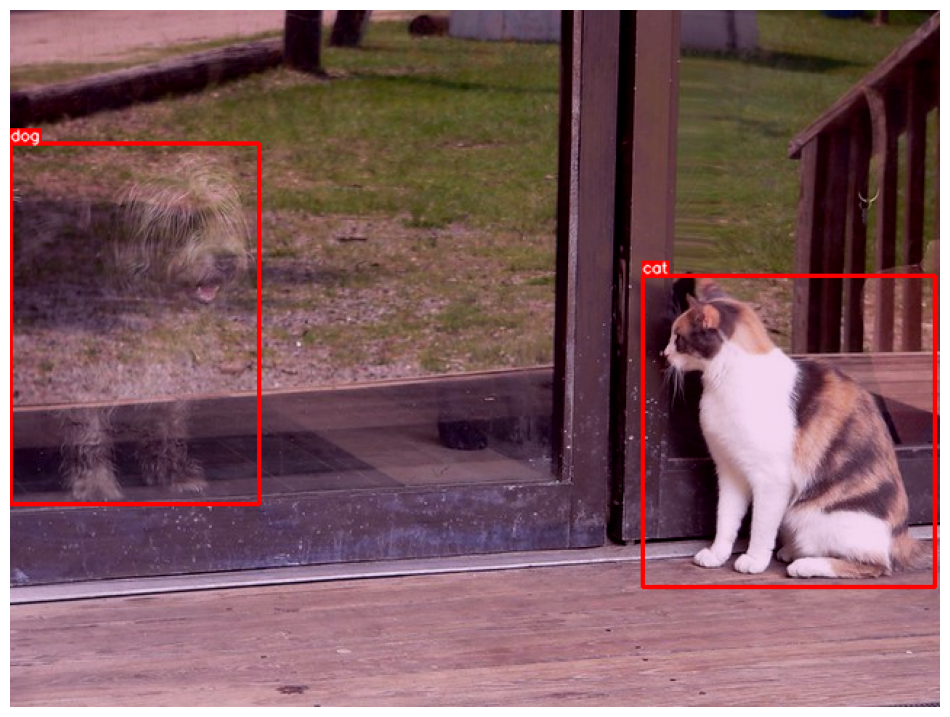

In [27]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
],
                      bbox_params=A.BboxParams(format='coco', label_fields=['category_ids'])
)

random.seed(7)

transformed_image = transform(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed_image['image'],
    transformed_image['bboxes'],
    transformed_image['category_ids'],
    category_id_to_name,
)

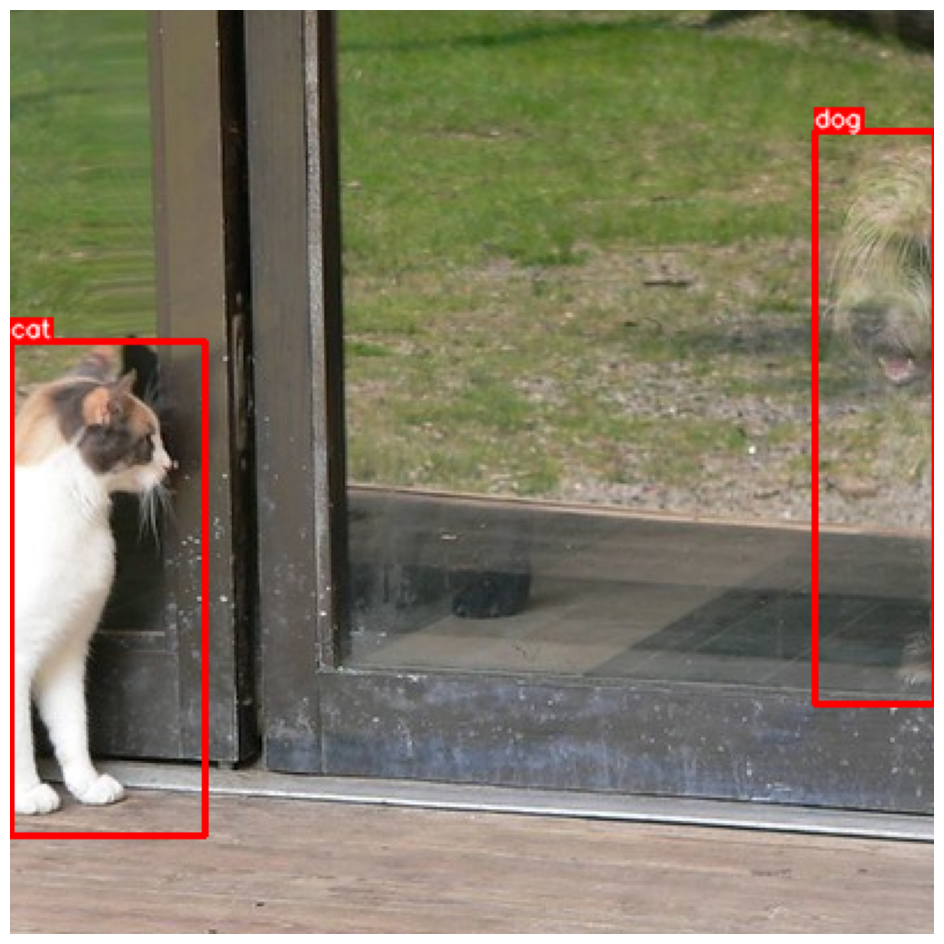

In [28]:
transform = A.Compose([A.CenterCrop(height=400, width=400, p=1)],
                      bbox_params=A.BboxParams(format='coco',  min_area=4500, label_fields=['category_ids'])
                          # If the area of a bounding box after augmentation becomes smaller than min_area, 
                          # Albumentations will drop that box. 
                          # So the returned list of augmented bounding boxes won't contain that bounding box.
)

random.seed(7)

transformed_image = transform(image=image, bboxes=bboxes, category_ids=category_ids)

visualize(
    transformed_image['image'],
    transformed_image['bboxes'],
    transformed_image['category_ids'],
    category_id_to_name,
)